# 感知机

## 参考
[感知器](https://www.jiqizhixin.com/graph/technologies/f9849d6c-6262-4c1f-8f42-6d976be17161)

[感知机原理](https://www.cnblogs.com/huangyc/p/9706575.html)

[算法——感知机详解（推导+证明）](https://zhuanlan.zhihu.com/p/46762820)

---

## 什么是线性可分

**线性可分**是机器学习和统计分类中的一个重要概念，特别是在处理分类问题时。它描述了一种特定的数据集特性，即存在一个线性决策边界（通常是一个超平面），可以完美地将数据集中的两个类别分开，没有任何误分类。

### 定义和直观理解

在二维空间中，如果你能用一条直线将两类数据点完全分开，那么这个数据集就是线性可分的。类似地，在更高维的空间中，如果存在一个平面（三维）或超平面（四维及以上）可以实现这种分割，数据集也被认为是线性可分的。

### 数学表述

对于一个二分类问题，假设有数据集 $\{(x_i, y_i)\}$，其中 $x_i$ 是特征向量，$y_i$ 是类别标签（通常为 +1 或 -1）。这个数据集是线性可分的，如果存在一组参数 $w$（权重向量）和 $b$（偏置项），使得：

- 对所有 $y_i = +1$ 的 $x_i$，有 $w \cdot x_i + b > 0$
- 对所有 $y_i = -1$ 的 $x_i$，有 $w \cdot x_i + b < 0$

这意味着所有正类和负类数据点都被超平面 $w \cdot x + b = 0$ 正确地分开。

### 线性可分的重要性

在机器学习中，线性可分性的概念非常重要，因为许多算法（如感知机、线性支持向量机）在理论上只能保证在数据完全线性可分时找到一个解决方案。如果数据是线性可分的，这些算法不仅能找到一个解，而且通常能找到最优解（例如，支持向量机找到的是最大间隔超平面）。

### 非线性可分数据

现实世界中的许多数据集并不是线性可分的。在这种情况下，可以采用几种策略来处理：

1. **使用非线性模型**：如决策树、随机森林或神经网络，这些模型可以捕捉数据中的复杂模式和非线性关系。
2. **特征转换或核技巧**：通过将数据映射到更高维的空间，可能实现原本在原始空间中不可分的数据的线性分割。例如，支持向量机中的核技巧就是基于这一原理。
3. **修改算法或损失函数**：如使用软间隔支持向量机，允许一定量的数据点分类错误，以增加模型的泛化能力和灵活性。

理解线性可分性及其在模型选择和算法性能中的影响，对于设计有效的机器学习系统至关重要。


## 感知机定义

感知机是二分类的线性模型，其输入是实例的特征向量，输出的是事例的类别，分别是+1和-1，属于判别模型。

假设训练数据集是线性可分的，感知机学习的目标是求得一个能够将训练数据集正实例点和负实例点完全正确分开的分离超平面。如果是非线性可分的数据，则最后无法获得超平面。

<div align=center>
<img src="images/20240418160900.png" width="30%">
</div>

### 点到线的距离

公式中的直线方程为 $Ax + By + C = 0$，点P的坐标为 $(x_0, y_0)$。

$$
d = \frac{|Ax_0 + By_0 + C|}{\sqrt{A^2 + B^2}}
$$

### 点到超平面距离

我们假设超平面方程为 $w \cdot x + b$，其中w = $(w_0, w_1, \ldots, w_m)$，x = $(x_0, x_1, \ldots, x_m)$。样本点到超平面的距离公式：

$$
d = \frac{|w \cdot x + b|}{\|w\|}
$$

### 超平面（Hyperplanes）
超平面是在空间$R^d$中的一个子空间$R^{d-1}$

在2维空间中的超平面是一条线，在3维空间中的超平面是一个平面。

## 感知机模型

<div align=center>
<img src="images/20240418170610.png" width="30%">
</div>


感知机从输入空间到输出空间的模型如下:  
$$  
\begin{array}{c}  
f(x)=\operatorname{sign}(w \cdot x+b) \\  
\operatorname{sign}(x)=\left\{\begin{array}{ll}  
-1 & x<0 \\  
1 & x \geq 0  
\end{array}\right.  
\end{array}  
$$


下面展示基于感知机的分类模型代码，包含训练与预测，数据集使用的是[安德森鸢尾花卉数据集](https://zh.wikipedia.org/wiki/%E5%AE%89%E5%BE%B7%E6%A3%AE%E9%B8%A2%E5%B0%BE%E8%8A%B1%E5%8D%89%E6%95%B0%E6%8D%AE%E9%9B%86)(其数据集包含了150个样本，都属于鸢尾属下的3个亚属，分别是山鸢尾、变色鸢尾和维吉尼亚鸢尾（英语：Virginia Iris）。每个样本都包含4项特征，即花萼和花瓣的长度和宽度，它们可用于样本的定量分析。基于这些特征，费雪发展了能够确定其属种的线性判别分析。)

训练样本数：  100
iter_coun:  722


Text(0, 0.5, 'sepal width')

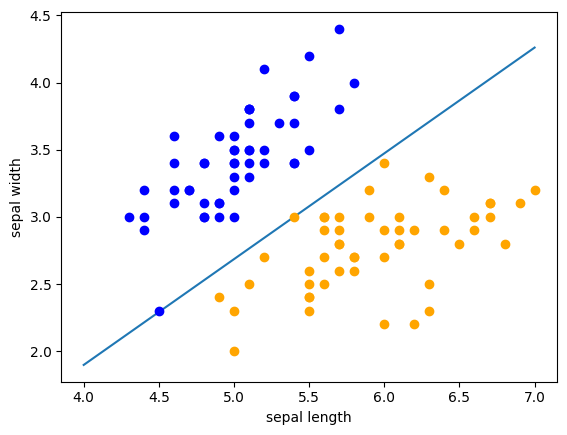

In [14]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

# 加载鸢尾花数据集
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target

# 重命名列名
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']

# 查看标签数量
df.label.value_counts()

# # 绘制散点图
# plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
# plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
# plt.xlabel('sepal length')
# plt.ylabel('sepal width')
# plt.legend()

# 准备数据
data = np.array(df.iloc[:100, [0, 1, -1]])
X, y = data[:,:-1], data[:,-1]
y = np.array([1 if i == 1 else -1 for i in y])

# 感知机模型
class Model:
    def __init__(self):
        self.w = np.ones(len(data[0]) - 1, dtype=np.float32)
        self.b = 0
        self.l_rate = 0.15

    '''
    x为输入数据
    w,b分别为模型权重和偏置
    '''
    def sign(self, x, w, b):
        y = np.dot(x, w) + b # 感知机模型
        return y

    # 随机梯度下降法训练感知机
    def fit(self, X_train, y_train):
        iter_coun=0
        is_wrong = False
        while not is_wrong:
            wrong_count = 0
            for d in range(len(X_train)): # 遍历所有训练样本
                X = X_train[d]
                y = y_train[d]
                if y * self.sign(X, self.w, self.b) <= 0: # 负样本情况下，梯度下降
                    self.w = self.w + self.l_rate * np.dot(y, X)
                    self.b = self.b + self.l_rate * y
                    wrong_count += 1
            if wrong_count == 0:
                is_wrong = True
                
            iter_coun += 1
        print("iter_coun: ", iter_coun)
        return 'Perceptron Model!'

perceptron = Model()

print('训练样本数： ', len(X))
# print()
perceptron.fit(X, y)

# 绘图部分
plt.figure()
# 绘制分类直线
x_points = np.linspace(4, 7, 10)
y_ = -(perceptron.w[0] * x_points + perceptron.b) / perceptron.w[1]
plt.plot(x_points, y_)

# 绘制数据点
plt.plot(data[:50, 0], data[:50, 1], 'o', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'o', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
# plt.legend()

### 感知机求解过程

在求解最优化问题时, 常用梯度下降、拟牛顿法等数值计算方法。具体地, 在这里采取随机梯度下降法。区别于传统的梯度下降, 随机梯度下降每次并不是计算所有误分类点, 而是在每次迭代过程中, 随机选取一个点, 按下式计算梯度。  
$$  
\begin{aligned}  
\nabla_{\omega} L(\omega, b) & =-\sum_{x_{i} \in M} y_{i} x_{i} \\  
\nabla_{b} L(\omega, b) & =-\sum_{x_{i} \in M} y_{i}  
\end{aligned}  
$$  
  
随机选取误分类点 $\left(x_{i}, y_{i}\right)$, 更新参数 $\omega, b$ :  
$$  
\begin{array}{c}  
\omega \leftarrow \omega+\eta y_{i} x_{i} \\  
b \leftarrow b+\eta y_{i}  
\end{array}  
$$  
  
其中, $\eta \in(0,1]$ 称之为学习率。  

则感知机算法描述如下:  
输入: $D=\left\{\left(x_{1}, y_{1}\right),\left(x_{2}, y_{2}\right), \ldots,\left(x_{m}, y_{m}\right)\right\}, y_{i} \in\{-1,+1\}$; 学习率 $\eta \in(0,1]$;  
  
输出: $\omega, b ;$ 感知机模型 $f(x)=\operatorname{sign}(\omega x+b)$  
1. 初始化 $\omega, b$  
2. 随机选取数据点 $\left(x_{i}, y_{i}\right)$  
3. 若出现误分类, 即 $-y_{i}\left(\omega x_{i}+b\right) \geq 0$  
$\omega \leftarrow \omega+\eta y_{i} x_{i}$  
$b \leftarrow b+\eta y_{i} $  
4. 转至 2 , 直至没有误分类点（或达到最大迭代次数）。


[[ 6.95 -8.73]]
[-11.2]


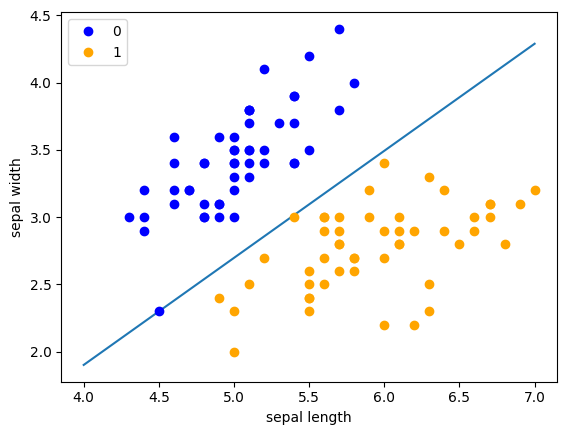

In [29]:
from sklearn.linear_model import Perceptron

# clf = Perceptron(max_iter=1000, shuffle=True)
# clf.fit(X, y)

# 和手写的感知机结果保持一致
clf = Perceptron(fit_intercept=True, max_iter=1000, shuffle=True, eta0=0.1, tol=None)
clf.fit(X, y)

'''
Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=False, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=False, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)
'''

# Weights assigned to the features.
print(clf.coef_)
#[[ 16.3 -24.2]]

# 截距 Constants in decision function.
print(clf.intercept_)
#[0.]

x_ponits = np.arange(4, 8)
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_ponits, y_)

plt.plot(data[:50, 0], data[:50, 1], 'o', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'o', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

### 对偶

对偶是最优化理论中的一个重要概念。对偶问题是原始问题的一种变形,它通常更容易求解,且其解与原始问题的解之间存在一定的关系。

对偶问题的一般形式如下:

原始问题(primal problem):
$$
\min_{x} f(x) \quad \text{s.t.} \quad g_i(x) \leq 0, i=1,2,\dots,m
$$

对偶问题(dual problem):
$$
\max_{\lambda \geq 0} \min_x \{f(x) + \sum_{i=1}^m \lambda_i g_i(x)\}
$$

其中:
- $x$ 是原始问题的决策变量
- $\lambda$ 是对偶问题的决策变量,称为[拉格朗日乘子](../数学基础篇/拉格朗日.md)
- $f(x)$ 是原始问题的目标函数
- $g_i(x) \leq 0$ 是原始问题的约束条件

对偶问题的求解一般比原始问题更容易,因为它只涉及一个无约束的优化问题。同时,原始问题和对偶问题的最优值之间存在一个不等式关系,称为对偶性。

对偶性质在最优化理论和机器学习中有广泛的应用,如支持向量机、凸优化等。理解对偶概念有助于更好地认识和分析优化问题。


### 感知机的对偶形式


在机器学习中，特别是在感知机算法的背景下，对偶形式是一种特殊的算法实现方式，它从另一个角度解决分类问题。感知机是一种二分类的线性分类模型，其目标是找到一个超平面来分隔两类数据点。

### 原始感知机算法

首先，了解原始感知机模型的基本形式是有助于理解对偶形式的。原始感知机模型通过以下优化问题定义：

- 给定训练数据集 $\{(x_i, y_i)\}_{i=1}^N$，其中 $x_i \in \mathbb{R}^d$ 是特征向量，$y_i \in \{-1, 1\}$ 是标签。
- 目标是找到一个权重向量 $w$ 和偏置 $b$，使得 $y_i (w \cdot x_i + b) > 0$ 对所有 $i$ 都成立。

### 对偶形式的感知机算法

对偶形式的感知机算法主要利用了数据点之间的内积。它引入了一个参数向量 $\alpha$，其中 $\alpha_i \geq 0$ 表示第 $i$ 个数据点对模型的贡献。在对偶形式中，权重向量 $w$ 可以表示为所有训练样本的线性组合：

$w = \sum_{i=1}^N \alpha_i y_i x_i$

偏置项 $b$ 通常通过类似的方式计算：

$b = \sum_{i=1}^N \alpha_i y_i$

### 算法步骤

1. **初始化**：所有的 $\alpha_i$ 初始化为 0，偏置 $b$ 初始化为 0。
2. **迭代更新**：对于每一个训练样本 $(x_i, y_i)$，计算预测值：
   $\hat{y_i} = \text{sign}\left(\sum_{j=1}^N \alpha_j y_j x_j \cdot x_i + b\right)$
   如果 $\hat{y_i} \neq y_i$，即分类错误，则更新：
   $\alpha_i \leftarrow \alpha_i + \eta$
   $b \leftarrow b + \eta y_i$
   其中 $\eta$ 是学习率，通常设为 1。
3. **重复**：直到所有样本正确分类或达到一个预设的迭代次数。

### 优点

对偶形式的感知机算法的主要优点是利用了核技巧。通过将数据点的内积替换为核函数，可以隐式地将数据映射到更高维的空间，从而处理非线性可分的数据集。

### 应用

对偶形式在实际应用中非常有用，特别是在数据维度高或者样本数量大的情况下，因为它可以有效地利用数据点之间的相互关系，而不需要显式地构造高维特征空间。


原始形式，分类完成！步长：0.3000, 共迭代 1518 次
对偶形式，分类完成！步长：0.3000, 共迭代 1562 次


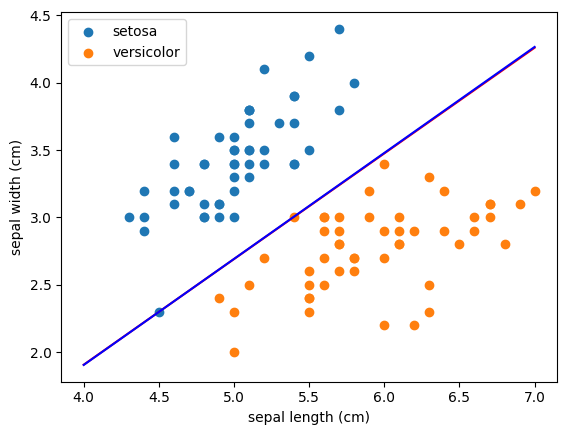

In [40]:
# 读取鸢尾花数据
iris = load_iris()
# 将鸢尾花4个特征，以4列存入pandas的数据框架
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# 在最后一列追加 加入标签（分类）列数据
df['lab'] = iris.target

# df.columns=[iris.feature_names[0], iris.feature_names[1], iris.feature_names[2], iris.feature_names[3], 'lab']
# df['lab'].value_counts()
# 选取前两种花进行划分（每种数据50组）
plt.scatter(df[:50][iris.feature_names[0]], df[:50][iris.feature_names[1]], label=iris.target_names[0])
plt.scatter(df[50:100][iris.feature_names[0]], df[50:100][iris.feature_names[1]], label=iris.target_names[1])
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

# 选取数据,前100行，前两个特征，最后一列标签
data = np.array(df.iloc[:100, [0, 1, -1]])
# X是除最后一列外的所有列，y是最后一列
X, y = data[:, :-1], data[:, -1]
# 生成感知机的标签值，+1， -1, 第一种-1，第二种+1
y = np.array([1 if i == 1 else -1 for i in y])

class PerceptronModel():
    def __init__(self, X, y, eta):
        self.w = np.zeros(len(X[0]), dtype=float)  # 权重
        self.b = 0  # 偏置
        self.lr = eta  # 学习率
        self.dataX = X  # 数据
        self.datay = y  # 标签
        self.iterTimes = 0  # 迭代次数

        # 对偶形式的参数
        self.a = np.zeros(len(X), dtype=float)  # alpha
        self.Gmatrix = np.zeros((len(X), len(X)), dtype=float)
        self.calculateGmatrix()  # 计算Gram矩阵

    def sign0(self, x, w, b):  # 原始形式sign函数
        y = np.dot(w, x) + b
        return y

    def sign1(self, a, G_j, Y, b):  # 对偶形式sign函数
        y = np.dot(np.multiply(a, Y), G_j) + b
        return y

    def OriginClassifier(self):  # 原始形式的分类算法
        self.iterTimes = 0
        self.b = 0
        stop = False
        while not stop:
            wrong_count = 0
            for i in range(len(self.dataX)):
                X = self.dataX[i]
                y = self.datay[i]
                if (y * self.sign0(X, self.w, self.b)) <= 0:
                    self.w += self.lr * np.dot(X, y)
                    self.b += self.lr * y
                    wrong_count += 1
                    self.iterTimes += 1
            if wrong_count == 0:
                stop = True
        print("原始形式，分类完成！步长：%.4f, 共迭代 %d 次" % (self.lr, self.iterTimes))

    def calculateGmatrix(self):  # 计算Gram矩阵
        for i in range(len(self.dataX)):
            for j in range(0, i + 1):  # 对称的计算一半就行
                self.Gmatrix[i][j] = np.dot(self.dataX[i], self.dataX[j])
                self.Gmatrix[j][i] = self.Gmatrix[i][j]

    def DualFormClassifier(self):  # 对偶形式分类算法
        self.iterTimes = 0
        self.b = 0
        stop = False
        while not stop:
            wrong_count = 0
            for i in range(len(self.dataX)):
                y = self.datay[i]
                G_i = self.Gmatrix[i]
                if (y * self.sign1(self.a, G_i, self.datay, self.b)) <= 0:
                    self.a[i] += self.lr
                    self.b += self.lr * y
                    wrong_count += 1
                    self.iterTimes += 1
            if wrong_count == 0:
                stop = True
        print("对偶形式，分类完成！步长：%.4f, 共迭代 %d 次" % (self.lr, self.iterTimes))
        
        
# 调用感知机进行分类，学习率eta
perceptron = PerceptronModel(X, y, eta=0.3)
perceptron.OriginClassifier()  # 原始形式分类

# 绘制原始算法分类超平面
x_points = np.linspace(4, 7, 10)
y0 = -(perceptron.w[0] * x_points + perceptron.b) / perceptron.w[1]
plt.plot(x_points, y0, 'r')

perceptron.DualFormClassifier()  # 对偶形式分类
# 由alpha，b 计算omega向量
omega0 = sum(perceptron.a[i] * y[i] * X[i][0] for i in range(len(X)))
omega1 = sum(perceptron.a[i] * y[i] * X[i][1] for i in range(len(X)))
y1 = -(omega0 * x_points + perceptron.b) / omega1

# 绘制对偶算法分类超平面
plt.plot(x_points, y1, 'b')

plt.legend()
plt.show()

## 感知机局限

感知机是一种基础的线性二分类模型，虽然在某些情况下表现良好，但它具有一些明显的局限性。了解这些局限性对于选择和设计更合适的机器学习模型非常重要。

### 1. **无法处理非线性问题**

`感知机的最大局限之一是它只能学习线性可分的数据。对于线性不可分的数据集，感知机算法无法收敛到一个有效的解。这意味着如果数据集中的正负样本不能通过一个线性超平面清晰地分开，感知机将无法找到一个合适的分类边界。`

### 2. 算法收敛性

对于线性可分的数据集，感知机学习算法保证会收敛到一个解（即存在一个超平面可以完美分割两类数据）。然而，这个解不是唯一的，并且算法的收敛速度可以非常慢。此外，感知机的结果也非常依赖于初始参数设置和数据的输入顺序。

### 3. 缺乏概率解释

感知机模型输出的是一个硬分类结果（-1 或 1），而不是类别的概率估计。这限制了其在需要概率输出以评估分类不确定性的应用中的使用，例如在医疗诊断或金融风险评估中。

### 4. 特征选择敏感

感知机的性能在很大程度上依赖于输入特征的选择。不适当的特征或特征缩放不当可能导致模型性能不佳。因此，感知机模型可能需要仔细的特征工程和预处理步骤。

### 5. 模型简单性

虽然模型的简单性有时是一个优点（例如，模型容易理解和实现），但在处理复杂的模式或关系时，感知机的简单性成为其局限。对于更复杂的数据结构，如图像、时间序列或文本数据，感知机可能无法捕捉足够的复杂性来进行有效的预测。

### 6. 超平面偏置问题

感知机算法倾向于对数据中的异常值和噪声非常敏感，这可能导致找到的超平面过于偏向某些异常样本。

### 解决方案

为了克服这些局限性，可以采用更复杂的算法，如支持向量机（SVM）、决策树、随机森林或神经网络等。这些方法可以处理非线性问题，提供概率输出，并能更好地处理高维数据和复杂的数据结构。对于非线性可分问题，使用核感知机或直接采用深度学习模型通常是更好的选择。
